## Supermat Grocery Sales Analysis Project

### STEP-1 import important libraries for analyze the data and visualize, cleaning and processing the data

In [1]:
import pandas as pd   # for data cleaning and processing the data
import numpy as np # for linear algebra
import matplotlib.pyplot as plt  #for visualization
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')  # this for is igore the warning

#### STEP-2 load the dataset

###### import data in csv

In [2]:
df=pd.read_csv("Supermat_Grocery_Sales_dataset.csv")

In [3]:
df.head()

Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region   Sales  Discount  Profit       State  
0  11-08-2017  North  1254.0      0.12  401.28  Tamil Nadu  
1  11-08-2017  South   749.0      0.18  149.80  Tamil Nadu  
2  06-12-2017   West  2360.0      0.21  165.20  Tamil Nadu  
3  10-11-2016  South   896.0      0.25   89.60  Tamil Nadu  
4  10-11-2016  South  2355.0      0.26  918.45  Tamil Nadu

In [4]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

### STEP-3 clean the data and pre-processing the data
###### -> Handling Missing Data
###### ->Standardizing data formates
###### -> Handling Duplicates
###### ->  Filter unwanted outtliers

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   8504 non-null   object 
 4   City           8504 non-null   object 
 5   Order Date     8504 non-null   object 
 6   Region         8504 non-null   object 
 7   Sales          8504 non-null   float64
 8   Discount       8504 non-null   float64
 9   Profit         8504 non-null   float64
 10  State          8504 non-null   object 
dtypes: float64(3), object(8)
memory usage: 859.0+ KB


In [6]:
df.shape  # this function is show the row and column

(9994, 11)

In [7]:
df.duplicated().sum()     # this duplicated function  is show the duplicated value

0

In [8]:
df.isnull().sum().sum()    # this show tthe null value in data 

11920

In [9]:
(df.isnull().sum().sum()/df.shape[0])*100

119.27156293776267

In [10]:
df.isnull().sum()

Order ID            0
Customer Name       0
Category            0
Sub Category     1490
City             1490
Order Date       1490
Region           1490
Sales            1490
Discount         1490
Profit           1490
State            1490
dtype: int64

In [11]:
(df.isnull().sum()/df.shape[0])*100

Order ID          0.000000
Customer Name     0.000000
Category          0.000000
Sub Category     14.908945
City             14.908945
Order Date       14.908945
Region           14.908945
Sales            14.908945
Discount         14.908945
Profit           14.908945
State            14.908945
dtype: float64

In [12]:
df.dropna(inplace=True)    #drop function is delete the null row

In [13]:
df.shape[0]

8504

## After cleaning 

In [14]:
(df.isnull().sum()/df.shape[0])*100

Order ID         0.0
Customer Name    0.0
Category         0.0
Sub Category     0.0
City             0.0
Order Date       0.0
Region           0.0
Sales            0.0
Discount         0.0
Profit           0.0
State            0.0
dtype: float64

In [15]:
df.info()   # info function is show the all column datatype and not null valu

<class 'pandas.core.frame.DataFrame'>
Index: 8504 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       8504 non-null   object 
 1   Customer Name  8504 non-null   object 
 2   Category       8504 non-null   object 
 3   Sub Category   8504 non-null   object 
 4   City           8504 non-null   object 
 5   Order Date     8504 non-null   object 
 6   Region         8504 non-null   object 
 7   Sales          8504 non-null   float64
 8   Discount       8504 non-null   float64
 9   Profit         8504 non-null   float64
 10  State          8504 non-null   object 
dtypes: float64(3), object(8)
memory usage: 797.2+ KB


# Convert 'Order Date' to datetime format


### Extract day, month, and year from 'Order Date'

In [16]:
df['Order Date']=pd.to_datetime(df['Order Date'],format='mixed')

In [17]:
df['Order Date'].head()

0   2017-11-08
1   2017-11-08
2   2017-06-12
3   2016-10-11
4   2016-10-11
Name: Order Date, dtype: datetime64[ns]

#### After convert datetime

In [18]:
df['Order Year']=df['Order Date'].dt.year
df['Order month']=df['Order Date'].dt.month
df['Order day']=df['Order Date'].dt.day
df.head(3)

Order ID Customer Name      Category   Sub Category         City Order Date  \
0      OD1        Harish  Oil & Masala        Masalas      Vellore 2017-11-08   
1      OD2         Sudha     Beverages  Health Drinks  Krishnagiri 2017-11-08   
2      OD3       Hussain   Food Grains   Atta & Flour   Perambalur 2017-06-12   

  Region   Sales  Discount  Profit       State  Order Year  Order month  \
0  North  1254.0      0.12  401.28  Tamil Nadu        2017           11   
1  South   749.0      0.18  149.80  Tamil Nadu        2017           11   
2   West  2360.0      0.21  165.20  Tamil Nadu        2017            6   

   Order day  
0          8  
1          8  
2         12

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8504 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       8504 non-null   object        
 1   Customer Name  8504 non-null   object        
 2   Category       8504 non-null   object        
 3   Sub Category   8504 non-null   object        
 4   City           8504 non-null   object        
 5   Order Date     8504 non-null   datetime64[ns]
 6   Region         8504 non-null   object        
 7   Sales          8504 non-null   float64       
 8   Discount       8504 non-null   float64       
 9   Profit         8504 non-null   float64       
 10  State          8504 non-null   object        
 11  Order Year     8504 non-null   int32         
 12  Order month    8504 non-null   int32         
 13  Order day      8504 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(3), object(7)
memory usage: 896.9+ KB

In [20]:
df.describe()   # describe functionn is describe the all numerical column 

Order Date        Sales     Discount       Profit  \
count                           8504  8504.000000  8504.000000  8504.000000   
mean   2017-04-30 20:05:48.824082688  1492.189675     0.226646   373.913921   
min              2015-01-03 00:00:00   500.000000     0.100000    25.250000   
25%              2016-05-24 00:00:00   992.000000     0.160000   180.442500   
50%              2017-06-26 00:00:00  1494.000000     0.230000   318.615000   
75%              2018-05-14 00:00:00  1989.250000     0.290000   522.727500   
max              2018-12-30 00:00:00  2500.000000     0.350000  1120.950000   
std                              NaN   578.301393     0.075038   239.218627   

        Order Year  Order month    Order day  
count  8504.000000  8504.000000  8504.000000  
mean   2016.724835     7.797037    15.518109  
min    2015.000000     1.000000     1.000000  
25%    2016.000000     5.000000     8.000000  
50%    2017.000000     9.000000    16.000000  
75%    2018.000000    11.000000    23.000000  
max    2018.000000    12.000000    31.000000  
std       1.120837     3.290614     8.749222

In [21]:
df.drop('Order Date',axis=1,inplace=True)  ## this fumnction is drop the columns


In [22]:
df.head()

Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

  Region   Sales  Discount  Profit       State  Order Year  Order month  \
0  North  1254.0      0.12  401.28  Tamil Nadu        2017           11   
1  South   749.0      0.18  149.80  Tamil Nadu        2017           11   
2   West  2360.0      0.21  165.20  Tamil Nadu        2017            6   
3  South   896.0      0.25   89.60  Tamil Nadu        2016           10   
4  South  2355.0      0.26  918.45  Tamil Nadu        2016           10   

   Order day  
0          8  
1          8  
2         12  
3         11  
4         11

In [46]:
data=df

In [47]:
data = pd.DataFrame(df)

In [49]:
data.to_csv("df.csv", index=False)

### ->  region_sales , region_profit , region by discount

In [23]:
# Aggregate data by region
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
region_profit = df.groupby('Region')['Profit'].sum().reset_index()
region_discount = df.groupby('Region')['Discount'].mean().reset_index()

# Merge all metrics into one dataframe
region_summary = region_sales.merge(region_profit, on='Region')
region_summary = region_summary.merge(region_discount, on='Region')

# Rename columns
region_summary.columns = ['Region', 'Total Sales', 'Total Profit', 'Average Discount']

# Display the results
region_summary

Region  Total Sales  Total Profit  Average Discount
0  Central    2951514.0     730219.49          0.228122
1     East    3570538.0     909880.50          0.227015
2    North       1254.0        401.28          0.120000
3    South    2079498.0     529834.71          0.226190
4     West    4086777.0    1009428.00          0.225514

## -> Data is neat and clean and its ready to EDA & visualization then find the insight in Grocessary sales analysis dataset

### step-4 EDA & Visualization 

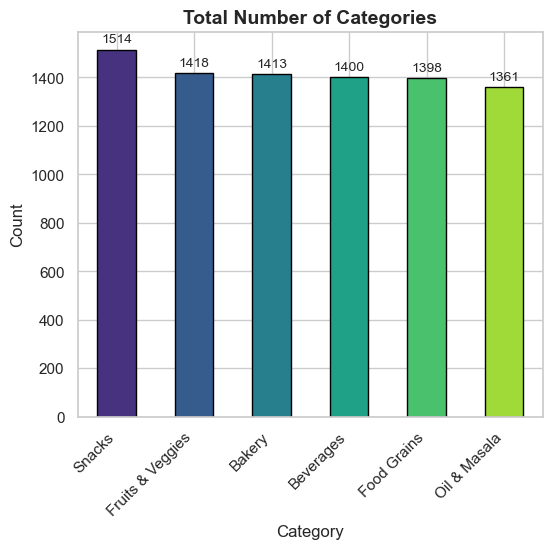

In [24]:
sns.set_theme(style="whitegrid")

# Create figure
plt.figure(figsize=(6, 5))

# Plot value counts with color palette
ax = df['Category'].value_counts().plot(kind='bar', 
                                        color=sns.color_palette("viridis", len(df['Category'].unique())),
                                        edgecolor='black')

# Add labels and title
plt.title("Total Number of Categories", fontsize=14, fontweight='bold')
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, padding=3)

# Show the plot
plt.show()

### The "Snacks" category has the highest count, indicating it is the most stocked or purchased item.
###  The "Oil & Masala" category has the lowest count, suggesting comparatively lower availability or demand

# sub-category

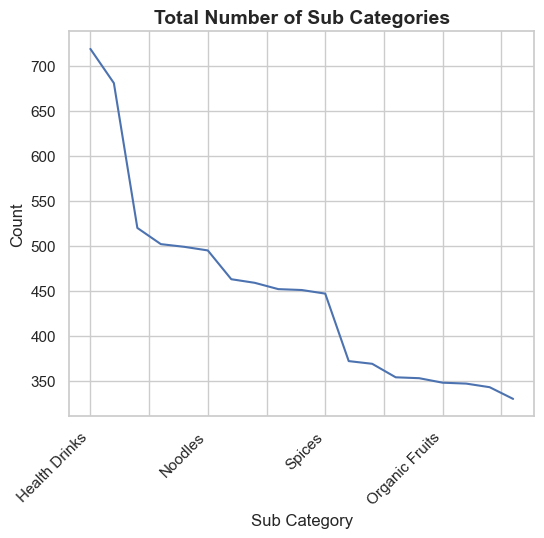

In [25]:
sns.set_theme(style="whitegrid")

# Create figure
plt.figure(figsize=(6, 5))

# Plot value counts with color palette
ax = df['Sub Category'].value_counts().plot(kind='line' )
                        
# Add labels and title
plt.title("Total Number of Sub Categories", fontsize=14, fontweight='bold')
plt.xlabel("Sub Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

### The "Health Drinks" subcategory has the highest count, indicating strong demand or availability.
### In contrast, "Organic Fruits" have the lowest count, suggesting lower stock or consumer preference.

In [26]:
df.columns.values

array(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Region', 'Sales', 'Discount', 'Profit', 'State', 'Order Year',
       'Order month', 'Order day'], dtype=object)

### -> Region by sales

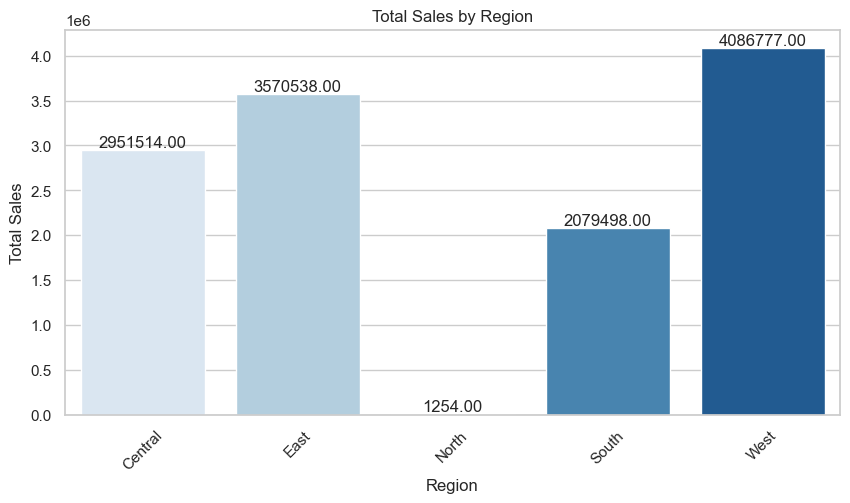

Region      Sales
0  Central  2951514.0
1     East  3570538.0
2    North     1254.0
3    South  2079498.0
4     West  4086777.0

In [27]:
# Aggregate sales data by region
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

# Visualization - Sales by Region
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Sales', data=region_sales, palette='Blues')

# Add text labels on bars
for index, row in region_sales.iterrows():
    plt.text(index, row['Sales'], f'{row["Sales"]:.2f}', ha='center', va='bottom')

# Set labels and title
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Total Sales by Region")
plt.xticks(rotation=45)

# Show plot
plt.show()

# Display the results
region_sales


### The West region has the highest total sales, while the North region has significantly lower sales, indicating a disparity in regional performance.
### The East and Central regions also show strong sales, but North’s extremely low sales suggest potential data issues or underperformance in that area.

# -> Region by Profit

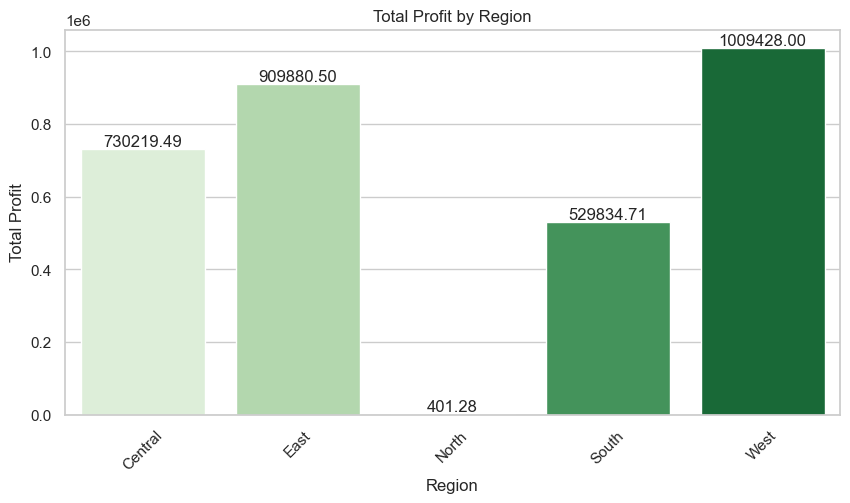

Region      Profit
0  Central   730219.49
1     East   909880.50
2    North      401.28
3    South   529834.71
4     West  1009428.00

In [28]:
# Visualization - Profit by Region
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Profit', data=region_profit, palette='Greens')

# Add text labels on bars
for index, row in region_profit.iterrows():
    plt.text(index, row['Profit'],f'{row["Profit"]:.2f}',  ha='center', va='bottom')

# Set labels and title
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.title("Total Profit by Region")
plt.xticks(rotation=45)

# Show plot
plt.show()

# Display the results
region_profit


### The West region generates the highest profit, followed by East and Central, indicating strong financial performance in these areas.
### The North region shows extremely low profit, suggesting inefficiencies, high costs, or low sales in that region.

# Region by discount

In [29]:
region_Discountt = df.groupby('Region')['Discount'].mean().reset_index()
region_Discountt

Region  Discount
0  Central  0.228122
1     East  0.227015
2    North  0.120000
3    South  0.226190
4     West  0.225514

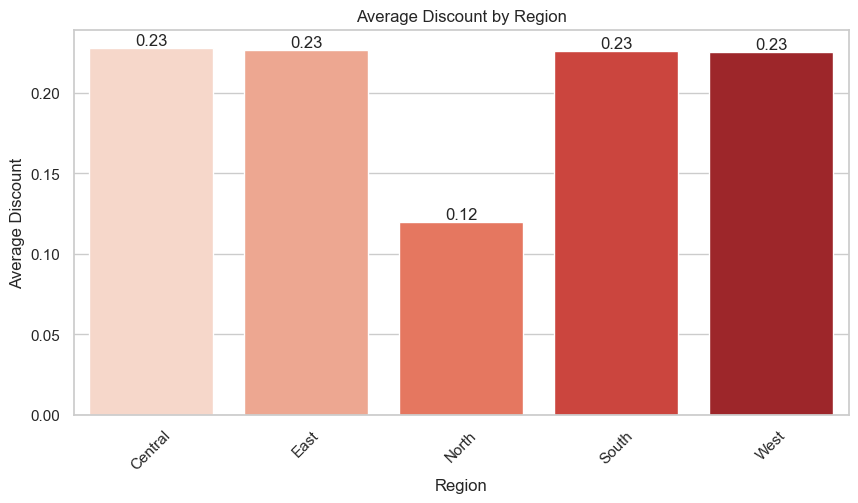

    Region  Discount
0  Central  0.228122
1     East  0.227015
2    North  0.120000
3    South  0.226190
4     West  0.225514


In [30]:

# Aggregate discount data by region
region_discount = df.groupby('Region')['Discount'].mean().reset_index()

# Visualization - Discount by Region
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Discount', data=region_discount, palette='Reds')

# Add text labels on bars
for index, discount in enumerate(region_discount['Discount']):
    plt.text(index, discount, f'{discount:.2f}', ha='center', va='bottom')

# Set labels and title
plt.xlabel("Region")
plt.ylabel("Average Discount")
plt.title("Average Discount by Region")
plt.xticks(rotation=45)

# Show plot
plt.show()

# Display the results
print(region_discount)

### Central, East, South, and West regions have a similar average discount of 0.23, indicating a uniform discount strategy across these areas.
### The North region has a significantly lower average discount (0.12), which might be affecting its lower sales and profit performance

### -> Region by sales ,profit and discount

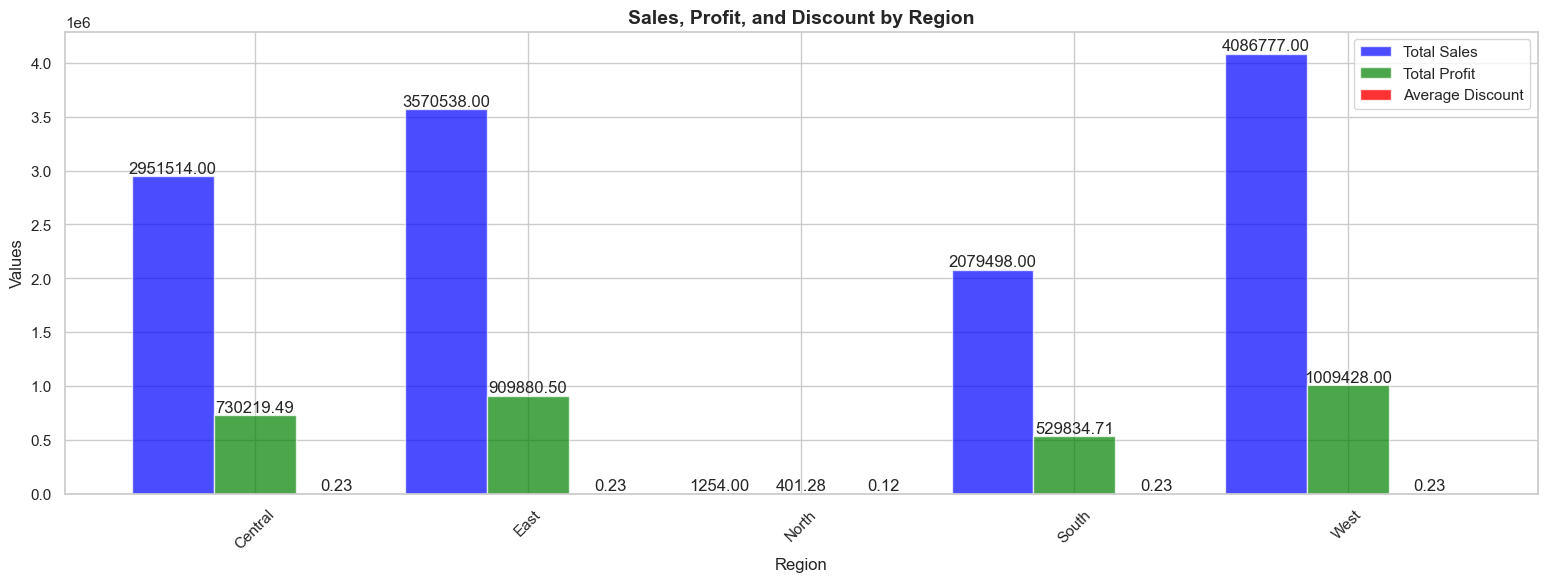

Region  Total Sales  Total Profit  Average Discount
0  Central    2951514.0     730219.49          0.228122
1     East    3570538.0     909880.50          0.227015
2    North       1254.0        401.28          0.120000
3    South    2079498.0     529834.71          0.226190
4     West    4086777.0    1009428.00          0.225514

In [31]:
# Aggregate data by region
region_summary = df.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum','Discount':'mean'}).reset_index()
# Rename columns
region_summary.columns = ['Region', 'Total Sales', 'Total Profit', 'Average Discount']

# Visualization - Merging all metrics into one graph
plt.figure(figsize=(19, 6))

# Set position for bars
bar_width = 0.3
positions = range(len(region_summary['Region']))

# Create bars for each metric
bars1 = plt.bar(positions, region_summary['Total Sales'], width=bar_width, label='Total Sales', color='blue', alpha=0.7)
bars2 = plt.bar([p + bar_width for p in positions], region_summary['Total Profit'], width=bar_width, label='Total Profit', color='green', alpha=0.7)
bars3 = plt.bar([p + 2 * bar_width for p in positions], region_summary['Average Discount'], width=bar_width, label='Average Discount', color='red', alpha=0.8)

# Add text labels on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Set labels and title
plt.xlabel("Region")
plt.ylabel("Values")
plt.title("Sales, Profit, and Discount by Region",fontsize=14, fontweight='bold')
plt.xticks([p + bar_width for p in positions], region_summary['Region'], rotation=45)
plt.legend()

# Show plot
plt.show()

# Display the results
region_summary

### West region leads in both sales (4M+) and profit (1M+), indicating strong market performance despite offering similar discounts as other high-performing regions.
### North region has extremely low sales (1,254) and profit (401), possibly due to its significantly lower discount (0.12), affecting customer attraction and revenue.
### Central, East, and South regions maintain a balance with moderate sales, profit, and uniform discounts (0.23), suggesting a consistent pricing strategy.

## Total Profit and Sales by State

In [32]:
# Group data by 'State' and sum 'Sales' and 'Profit'
state_summary = df.groupby('State').agg({'Sales': 'sum', 'Profit': 'sum','Discount':'mean'}).reset_index()

#rename column
state_summary.columns=['State','Total Sales','Total Profit','Average Discount']

state_summary

State  Total Sales  Total Profit  Average Discount
0  Tamil Nadu   12689581.0    3179763.98          0.226646

### Total Profit and Total Sales by Category

In [33]:
# Group data by 'Category' and sum 'Sales' and 'Profit'
Category_summary = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum','Discount':'mean'}).reset_index()

#rename the column
Category_summary.columns=['Category','Total Sales','Total Profit','Total Discount']


Category_summary

Category  Total Sales  Total Profit  Total Discount
0            Bakery    2112281.0     528521.06        0.225428
1         Beverages    2085313.0     525605.76        0.230329
2       Food Grains    2115272.0     529162.64        0.228548
3  Fruits & Veggies    2100727.0     530400.38        0.229295
4      Oil & Masala    2038442.0     497895.29        0.224526
5            Snacks    2237546.0     568178.85        0.222048

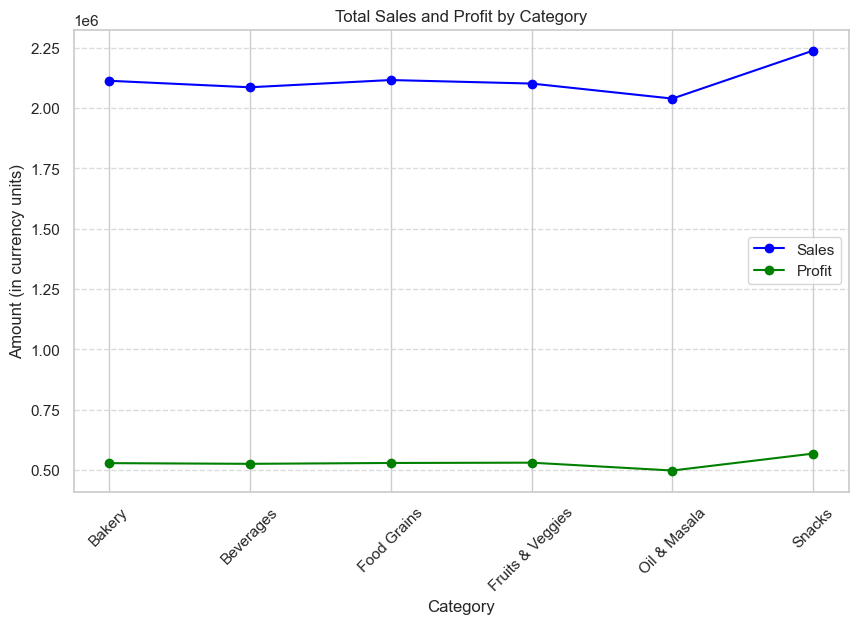

In [34]:

# Aggregate sales and profit by category
category_summary = df.groupby("Category")[["Sales", "Profit"]].sum().reset_index()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(category_summary["Category"], category_summary["Sales"], marker='o', linestyle='-', color="blue", label="Sales")
ax.plot(category_summary["Category"], category_summary["Profit"], marker='o', linestyle='-', color="green", label="Profit")

#category_summary.plot(kind="line", x="Category", y=["Sales", "Profit"], ax=ax, color=["blue", "green"])

# Customize the plot
plt.title("Total Sales and Profit by Category")
plt.ylabel("Amount (in currency units)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.legend(["Sales", "Profit"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

## The chart shows total sales and profit by category. Sales are consistently high across categories,
## while profit varies, suggesting differing cost structures or pricing strategies. 
## "Bakery" and "Snacks" categories appear to have the highest profit margins

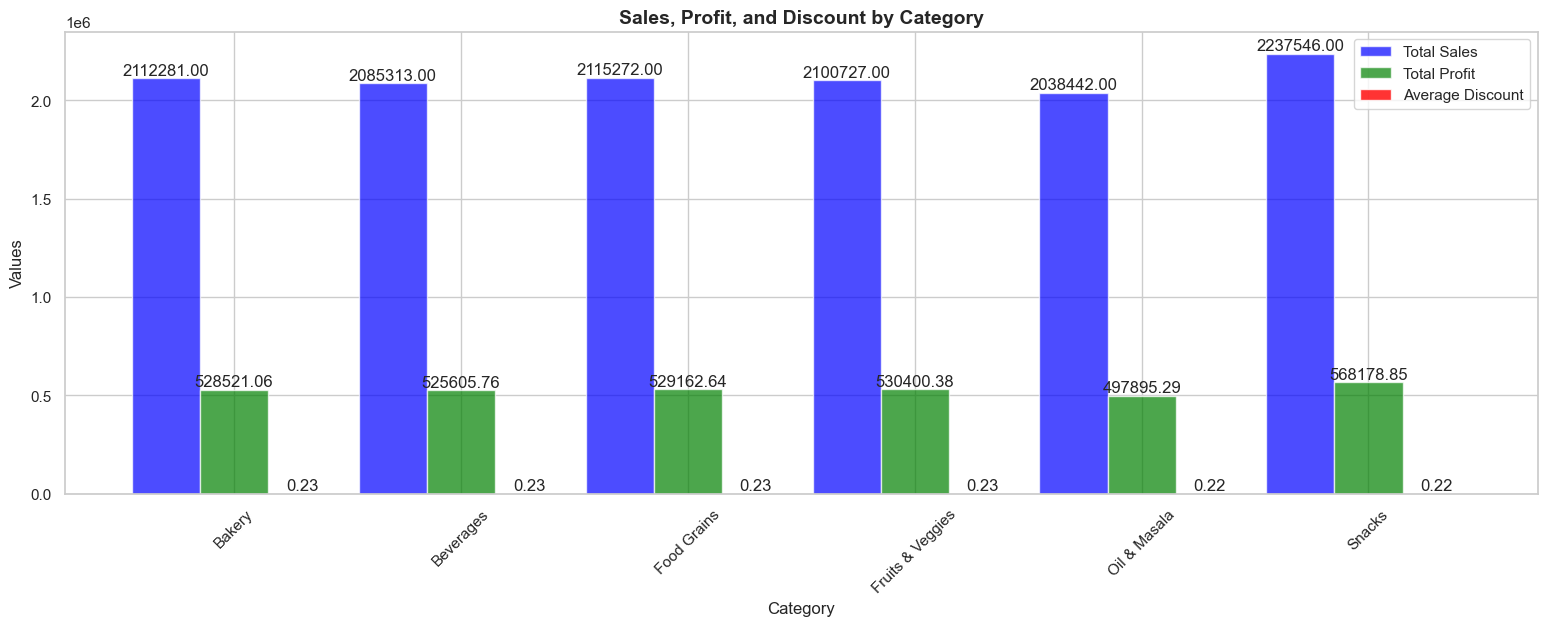

In [35]:
# Aggregate data by Category
Category_summary = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum','Discount':'mean'}).reset_index()
# Rename columns
Category_summary.columns = ['Category', 'Total Sales', 'Total Profit', 'Average Discount']

# Visualization - Merging all metrics into one graph
plt.figure(figsize=(19, 6))

# Set position for bars
bar_width = 0.3
positions = range(len(Category_summary['Category']))

# Create bars for each metric
bars1 = plt.bar(positions, Category_summary['Total Sales'], width=bar_width, label='Total Sales', color='blue', alpha=0.7)
bars2 = plt.bar([p + bar_width for p in positions], Category_summary['Total Profit'], width=bar_width, label='Total Profit', color='green', alpha=0.7)
bars3 = plt.bar([p + 2 * bar_width for p in positions],Category_summary['Average Discount'], width=bar_width, label='Average Discount', color='red', alpha=0.8)

# Add text labels on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Set labels and title
plt.xlabel("Category")
plt.ylabel("Values")
plt.title("Sales, Profit, and Discount by Category",fontsize=14, fontweight='bold')
plt.xticks([p + bar_width for p in positions], Category_summary['Category'], rotation=45)
plt.legend()

# Show plot
plt.show()


### Top Sales Category: Snacks have the highest total sales (~2.23M), followed closely by Bakery and Food Grains.
### Profitability Variation: Although sales are high across categories, profit margins vary, with Bakery and Snacks leading in profits.
### Zero Sales & Profit: The "Eggs" category shows zero sales and profit, possibly indicating missing data or lack of sales.
### Balanced Performance: Categories like Fruits & Veggies and Oil & Masala have steady sales and moderate profits.

## Sub Category by sales and profit

In [36]:
# Group data by 'Sub Category' and sum 'Sales' and 'Profit'
Sub_Category_summary = df.groupby('Sub Category').agg({'Sales': 'sum', 'Profit': 'sum','Discount':'mean'}).reset_index()

#rename the column
Sub_Category_summary.columns=['Sub Category','Total Sales','Total Profit','Total Discount']
Sub_Category_summary.head(4)

Sub Category  Total Sales  Total Profit  Total Discount
0   Atta & Flour     534649.0     127861.10        0.227875
1       Biscuits     684083.0     169357.62        0.225033
2  Breads & Buns     742586.0     190764.98        0.226494
3          Cakes     685612.0     168398.46        0.224646

<function matplotlib.pyplot.show(close=None, block=None)>

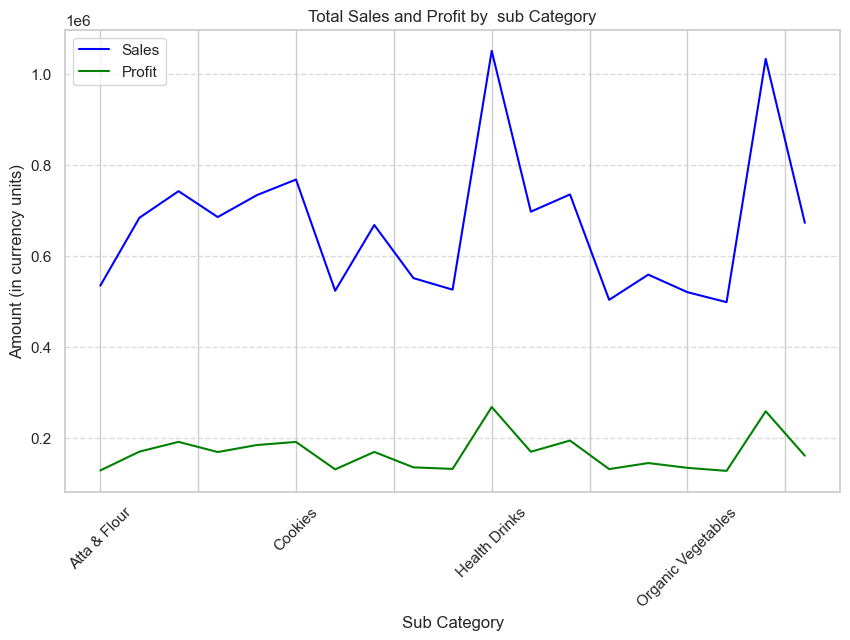

In [37]:
sub_category_summary = df.groupby("Sub Category")[["Sales", "Profit"]].sum().reset_index()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
sub_category_summary.plot(kind="line", x="Sub Category", y=["Sales", "Profit"] ,ax=ax, color=["blue", "green"])

# Customize the plot
plt.title("Total Sales and Profit by  sub Category")
plt.ylabel("Amount (in currency units)")
plt.xlabel("Sub Category")
plt.xticks(rotation=45)
plt.legend(["Sales", "Profit"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show

### Sales Peaks: Certain subcategories, such as "Health Drinks" and "Organic Vegetables," have significantly high sales compared to others.
### Profit Trends: Although sales fluctuate, profit remains relatively stable across subcategories, with minor variations.
### High Sales, Low Profit: Some subcategories show high sales but comparatively lower profits, indicating possible high costs or discounts.
### Growth Opportunities: Categories with lower profits despite high sales may need pricing or cost optimization for better profitability

### City by sale and profit

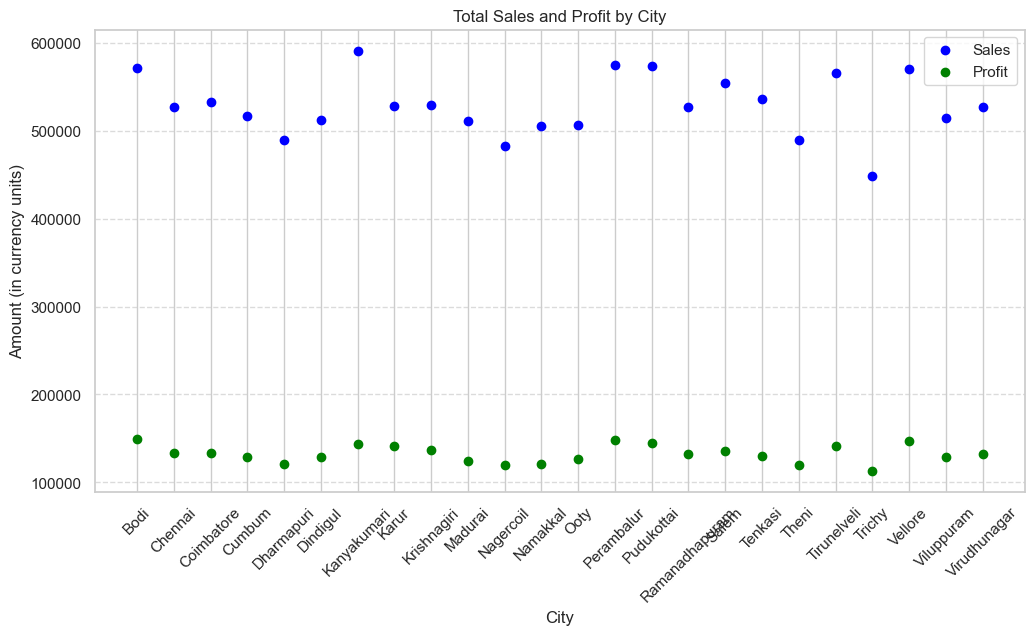

In [38]:
# Group data by city and calculate total sales and profit
City_summary = df.groupby("City")[["Sales", "Profit"]].sum().reset_index()

# Plot the scatter chart
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot for Sales
ax.scatter(City_summary["City"], City_summary["Sales"], color="blue", label="Sales")

# Scatter plot for Profit
ax.scatter(City_summary["City"], City_summary["Profit"], color="green", label="Profit")

# Customize the plot
plt.title("Total Sales and Profit by City")
plt.ylabel("Amount (in currency units)")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


### Cities with higher sales do not always have higher profits, indicating variations in profitability across locations.
### ome cities show significant profit despite lower sales, suggesting better margins or cost efficiencies.

In [39]:
print(df.columns)

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Region', 'Sales', 'Discount', 'Profit', 'State', 'Order Year',
       'Order month', 'Order day'],
      dtype='object')


In [40]:
df['Order month'].unique()

array([11,  6, 10,  4, 12,  5,  8,  7,  1,  9,  3,  2])

### Order year by sales , profit and Discount

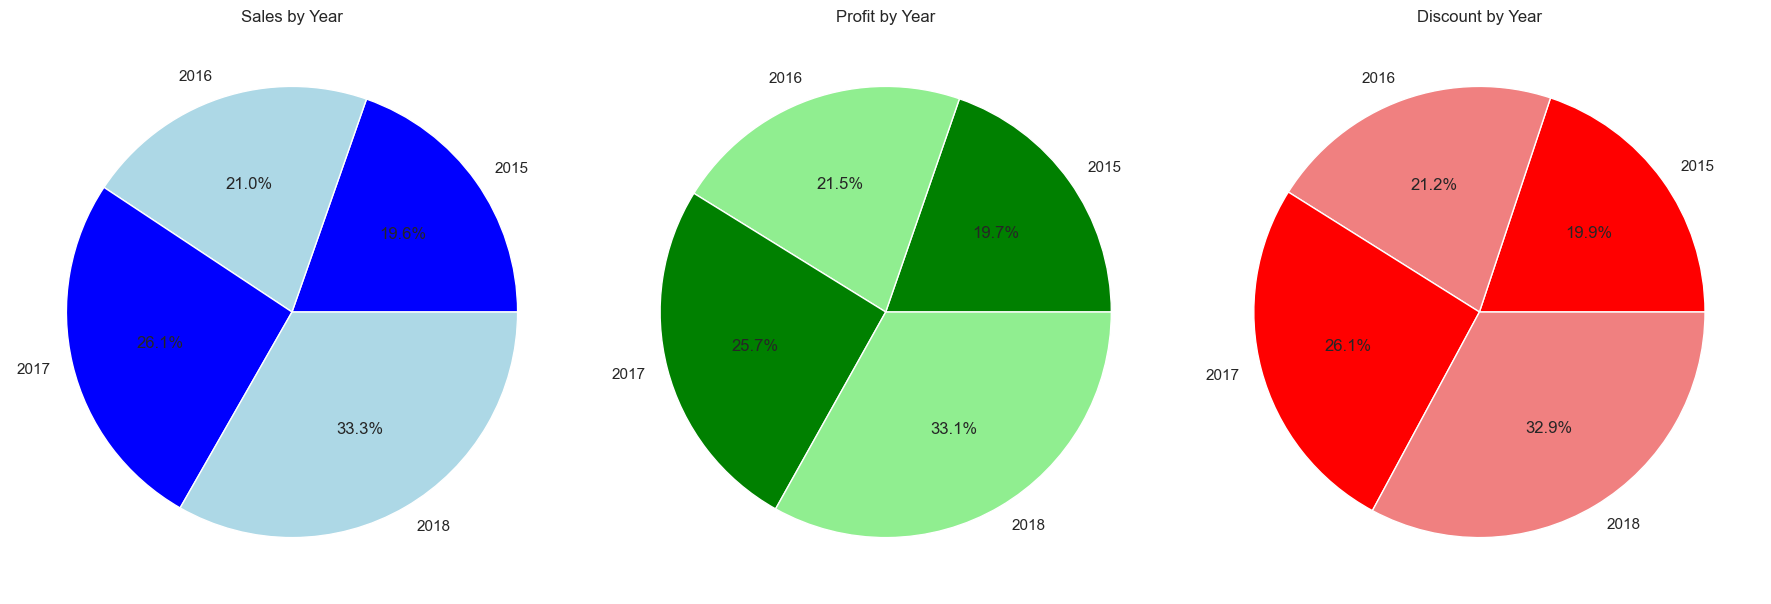

In [41]:
# Group by Order Year and sum Sales, Profit, and Discount
yearly_summary = df.groupby("Order Year")[["Sales", "Profit", "Discount"]].sum().reset_index()

# Create Pie Charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Sales Pie Chart
axes[0].pie(yearly_summary["Sales"], labels=yearly_summary["Order Year"], autopct='%1.1f%%', colors=['blue', 'lightblue'])
axes[0].set_title("Sales by Year")

# Profit Pie Chart
axes[1].pie(yearly_summary["Profit"], labels=yearly_summary["Order Year"], autopct='%1.1f%%', colors=['green', 'lightgreen'])
axes[1].set_title("Profit by Year")

# Discount Pie Chart
axes[2].pie(yearly_summary["Discount"], labels=yearly_summary["Order Year"], autopct='%1.1f%%', colors=['red', 'lightcoral'])
axes[2].set_title("Discount by Year")

# Show Plot
plt.tight_layout()
plt.show()


### Sales, profit, and discounts all show a consistent increase over the years, with 2018 contributing the highest share in all three categories.
### The year 2017 also had a significant share, indicating strong business performance before reaching its peak in 2018.
### The lowest share is observed in 2015 across all metrics, suggesting a steady growth trend in sales, profit, and discount allocation over time.

### sales and profit by order year

In [42]:
import pandas as pd
import plotly.express as px

# Grouping data by Order Year
yearly_summary = df.groupby("Order Year")[["Sales", "Profit"]].sum().reset_index()

# Create Bar Chart
fig = px.bar(
    yearly_summary, 
    x="Order Year", 
    y=["Sales", "Profit"], 
    barmode="group",  # Group bars side by side
    title="Total Sales and Profit by Order Year",
    labels={"value": "Amount (in currency units)", "Order Year": "Year"},
    color_discrete_map={"Sales": "blue", "Profit": "green"}
)

# Show figure
fig.show()


### The bar chart shows a steady increase in both sales and profit from 2015 to 2018, indicating business growth. However, 
### the profit margin remains relatively low compared to sales, suggesting potential cost or pricing optimizations

### Sales and profit by order month

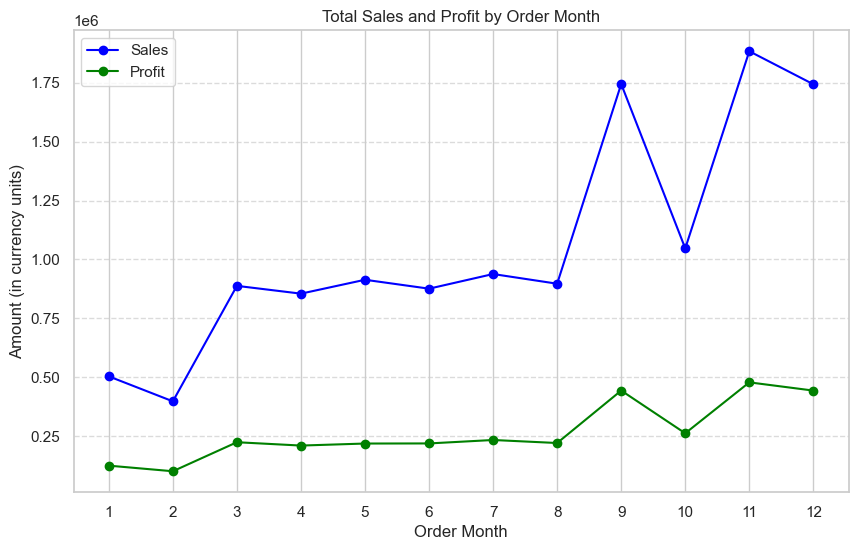

In [43]:
# Group data by Order Month
Order_month_summary = df.groupby("Order month")[["Sales", "Profit"]].sum().reset_index()

# Plot the line chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Order_month_summary["Order month"], Order_month_summary["Sales"], marker='o', linestyle='-', color="blue", label="Sales")
ax.plot(Order_month_summary["Order month"], Order_month_summary["Profit"], marker='o', linestyle='-', color="green", label="Profit")

# Customize the plot
plt.title("Total Sales and Profit by Order Month")
plt.ylabel("Amount (in currency units)")
plt.xlabel("Order Month")
plt.xticks(Order_month_summary["Order month"])  # Ensure proper month ticks
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

### Sales and profit exhibit a strong upward trend from August to December, with peaks in September and November.
### February has the lowest sales and profit, suggesting weaker demand during this period.

### sales and profit by order day

KeyError: 'Order day'

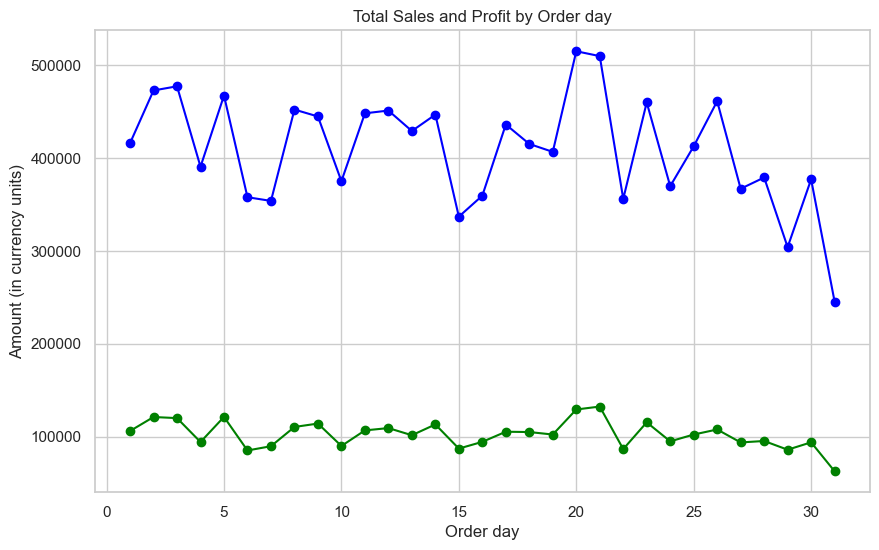

In [44]:
# Group data by Order day
Order_day_summary = df.groupby("Order day")[["Sales", "Profit"]].sum().reset_index()

# Plot the line chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Order_day_summary["Order day"], Order_day_summary["Sales"], marker='o', linestyle='-', color="blue", label="Sales")
ax.plot(Order_day_summary["Order day"], Order_day_summary["Profit"], marker='o', linestyle='-', color="green", label="Profit")

# Customize the plot
plt.title("Total Sales and Profit by Order day")
plt.ylabel("Amount (in currency units)")
plt.xlabel("Order day")
plt.xticks(Order_month_summary["Order day"])  # Ensure proper month ticks
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

### Sales and profit show fluctuations throughout the month, with peaks around the 20th and 21st, indicating higher purchasing activity.
### The end of the month experiences a decline in both sales and profit, suggesting lower consumer spending during this period